# Project

#### This project is an exploratory data analysis for the used car dataset. The dataset lists the car names, company, price of the car, total km driven, and the fuel type of the car. The data set is assumed to be data obtained from a site selling used cars.

## Goals
#### The goal of the project is to find as much information as possible from the data set. Some of the information the analyst wishes to find are:
- What brands have the most number of listed used cars on the site?
- How many cars from each car brand are driven by petrol, diesel or LPG?
- What's the 5 most/least expensive used car brands?
- Is there a relationship between mileage and price of the used cars?
- From 2010 models for the audi and mahindra cars which of the two brands has the most expensive cars(on average)?


In [233]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
pd.options.display.float_format = '{:,.2f}'.format

In [235]:
# loading the data set and viewing it

used_cars_ds = pd.read_csv('C:/Users/ADINO TAWONA/Desktop/Data Analysis Portfolio Projects/quikr_car.csv')
used_cars_ds.head()

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000",Diesel


In [236]:
# getting the total number of columns and rows
used_cars_ds.shape

(892, 6)

In [237]:
# viewing basic information about the dataset

used_cars_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name of car   892 non-null    object
 1   Company name  892 non-null    object
 2   Year          892 non-null    object
 3   Price         892 non-null    object
 4   Kms driven    840 non-null    object
 5   Fuel_type     837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## House Keeping aka Data Cleaning

In [238]:
# renaming columns
names_dict = {
    'Name of car': 'name_of_car',
    'Company name': 'company_name',
    'Kms driven':'kms_driven',
}

used_cars_ds.rename(columns=names_dict, inplace=True)

In [239]:
# The kms_driven column has some numbers with units some without. The next step is to fix the column so that we remain only
# with numbers without units and records have fuel type as labels we need to remove those.

# droping rows with kms_driven labeled with fuel type
used_cars_ds = used_cars_ds.drop(labels=[890,891])

In [240]:
# removing units in rows with units
used_cars_ds['kms_driven'] = [x if type(x) == float else x[0] for x in used_cars_ds.kms_driven.str.split(' ')]

In [241]:
# Null values

null_values_in_col = used_cars_ds.isnull().sum()
null_values_in_col

name_of_car      0
company_name     0
Year             0
Price            0
kms_driven      52
Fuel_type       53
dtype: int64

In [242]:
# percentage of null values is very low hence we can drop all null values
total_num_of_cells = np.product(used_cars_ds.shape)
total_number_of_null_cells = null_values_in_col.values.sum()

percentage_of_null_values = (total_number_of_null_cells/total_num_of_cells)*100
percentage_of_null_values

1.9662921348314606

In [243]:
used_cars_ds=used_cars_ds.dropna()

In [244]:
used_cars_ds['Year'] = pd.to_datetime(used_cars_ds.Year)
used_cars_ds['Year'] = used_cars_ds.Year.dt.year

In [245]:
used_cars_ds.dtypes

name_of_car     object
company_name    object
Year             int64
Price           object
kms_driven      object
Fuel_type       object
dtype: object

In [246]:
# removing the rows with the price column written ask for price and substituting them with zeros. Fist will create a new Price
# status column highlighting wether price is available or should be asked for.

used_cars_ds['Price_status'] = ['Ask' if x == "Ask For Price" else 'Available' for x in used_cars_ds.Price]
used_cars_ds['Price'] = [0 if x == "Ask For Price" else x for x in used_cars_ds.Price]

In [248]:
used_cars_ds['Price'] =used_cars_ds['Price'].astype('string')

In [249]:
used_cars_ds['Price'] = used_cars_ds.Price.str.replace(',', '')


In [250]:
used_cars_ds['Price'] = used_cars_ds['Price'].astype('int')
used_cars_ds['kms_driven'] = used_cars_ds.kms_driven.str.replace(',','')
used_cars_ds['kms_driven'] = used_cars_ds['kms_driven'].astype('float')

In [251]:
used_cars_cleaned = used_cars_ds

In [252]:
used_cars_cleaned.to_excel(
    'C:/Users/ADINO TAWONA/Desktop/Data Analysis Portfolio Projects/used_cars_cleaned.xlsx', sheet_name='Used Cars Data',
    index = False
)

## Company with the most cars listed

In [253]:
used_cars_cleaned.head()

,name_of_car,company_name,Year,Price,kms_driven,Fuel_type,Price_status
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000.00",Petrol,Available
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40.00,Diesel,Available
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,0,"22,000.00",Petrol,Ask
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000.00",Petrol,Available
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000.00",Diesel,Available


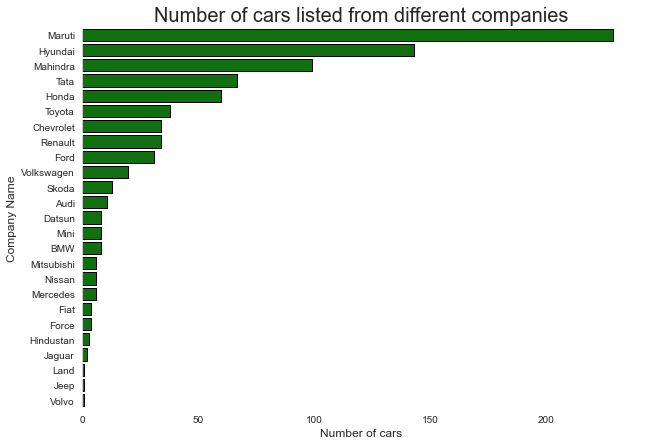

In [254]:
# Plotting graph showing company with the most listed cars 
plt.rcParams['figure.figsize'] = (10,7)
g1 = sns.countplot(y='company_name', data=used_cars_cleaned, color='green', edgecolor='black',
                  order=used_cars_cleaned['company_name'].value_counts().index)
g1.set_facecolor('white')
g1.axes.set_title('Number of cars listed from different companies', fontsize=20, fontweight=14)
g1.axes.set_ylabel('Company Name', fontsize=12)
g1.axes.set_xlabel('Number of cars', fontsize=12)
plt.show()

#### The Maruti brand has the most cars listed on the platform followed by Hyundai. Volvo, Jeep and Land Rover are the least common brands on the site.

## How many cars from each company have fuel type diesel and how many had petrol

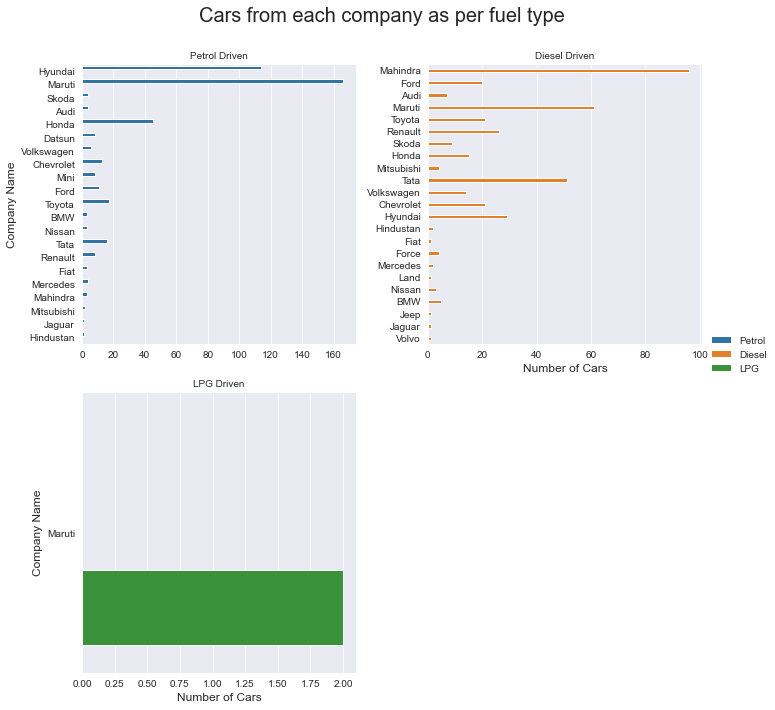

In [255]:
g2=sns.catplot(kind='count', y='company_name', data=used_cars_cleaned, hue='Fuel_type', col='Fuel_type', col_wrap=2,
           sharey=False, sharex=False)
g2.add_legend()
g2.fig.subplots_adjust(top=.9)
g2.fig.suptitle('Cars from each company as per fuel type', fontsize=20)
g2.set_titles(col_template='{col_name} Driven',)
g2.set_xlabels('Number of Cars', fontsize=12, clear_inner=False)
g2.set_ylabels('Company Name', fontsize=12, clear_inner=False)
plt.show()

#### Maruti has has the most fuel driven cars, and Hindustan has the least. For Dieasel driven cars we have Mahindra leading the pac with over 85 dieasel fuel cars and volvo has the least. Maruti is the only car company with LPG driven cars listed on the site.

## What are the 5 Most Expensive Used Car Brands

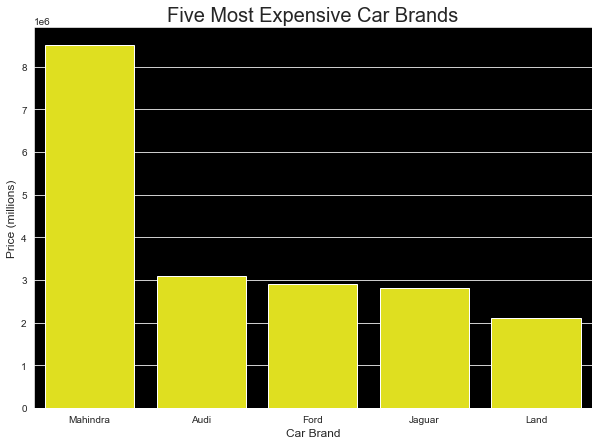

In [256]:
most_expensive= used_cars_cleaned.groupby(['company_name']).agg({'Price':'max'}).sort_values('Price', ascending=False).reset_index()
sns.set_style('darkgrid')
g3 = sns.barplot(x='company_name', y='Price', data=most_expensive.nlargest(5, columns=['Price']), color='yellow')
g3.set_title('Five Most Expensive Car Brands', fontweight=12, fontsize=20)
g3.set_xlabel('Car Brand', fontsize=12)
g3.set_ylabel('Price (millions)', fontsize=12)
g3.set_facecolor('black')
plt.show()

## 5 Least Expensive Car Brands

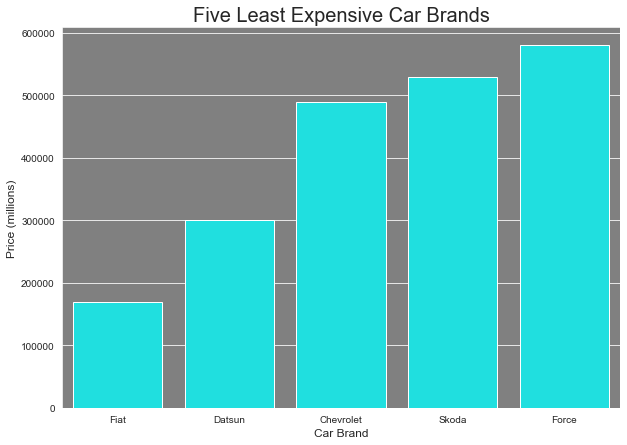

In [257]:
most_expensive= used_cars_cleaned.groupby(['company_name']).agg({'Price':'max'}).sort_values('Price', ascending=False).reset_index()
sns.set_style('darkgrid')
g3 = sns.barplot(x='company_name', y='Price', data=most_expensive.nsmallest(5, columns=['Price']), color='cyan')
g3.set_title('Five Least Expensive Car Brands', fontweight=12, fontsize=20)
g3.set_xlabel('Car Brand', fontsize=12)
g3.set_ylabel('Price (millions)', fontsize=12)
g3.set_facecolor('grey')
plt.show()

In [258]:
# checking for outliers on kms_driven variable by sorting

used_cars_cleaned[['company_name','name_of_car','kms_driven']].sort_values(['kms_driven'],ascending=True)

,company_name,name_of_car,kms_driven
721,Maruti,Maruti Suzuki Zen Estilo LXI Green CNG,0.00
376,Mahindra,Mahindra Jeep CL550 MDI,0.00
763,Tata,Tata Nexon,0.00
702,Ford,Ford Figo Petrol Titanium,0.00
762,Tata,Tata Tiago Revotorq XZ,0.00
...,...,...,...
589,Tata,Tata Indigo eCS LX TDI BS III,"195,000.00"
690,Maruti,Maruti Suzuki Ertiga Vxi,"200,000.00"
612,Tata,Tata Manza Aqua Quadrajet,"200,000.00"
139,Hindustan,Hindustan Motors Ambassador,"200,000.00"


##### the sorted values show cars with zero distance driven. Are these new cars?

## Is there a relationship between Price and mileage of car?

In [259]:
# sampling the cars
sample_cars = used_cars_cleaned.sample(n=100, random_state=20)

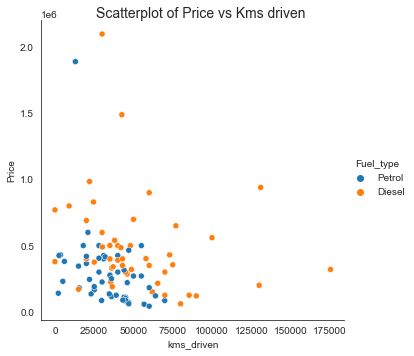

In [260]:
#ploting a relplot
sns.set_style('white')
g4 = sns.relplot(x='kms_driven', y='Price', data=sample_cars, hue='Fuel_type')
g4.fig.suptitle('Scatterplot of Price vs Kms driven', fontsize=14)
plt.show()

#### There is no relationship between the two variables... what we notice is the concentration of cars on the lower end of both variables


### From 2010 models which cars, between the mahindra and audi brands, had the most expensive cars?

In [261]:
# getting cars made from 2010 going up
models_from_2010 = used_cars_cleaned.query('Year >= 2010')
# getting only the mahindra and audi cars
mahi_aud_cars = models_from_2010[(models_from_2010['company_name']=="Audi") | (models_from_2010['company_name']=="Mahindra") ]
mahi_aud_models = mahi_aud_cars.groupby(['Year', 'company_name']).agg({'Price': 'mean'}).reset_index()

In [262]:
sns.set_style('darkgrid')

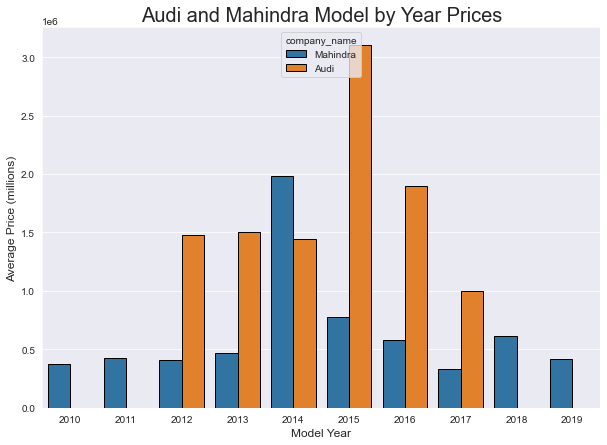

In [263]:
g5=sns.barplot(x='Year', y='Price', data=mahi_aud_models, hue='company_name', edgecolor='black')
g5.set_title('Audi and Mahindra Model by Year Prices', fontsize=20)
g5.set_xlabel('Model Year', fontsize=12)
g5.set_ylabel('Average Price (millions)', fontsize=12)
plt.show()

#### The plot above shows that for the 2012-2017 models used cars listed on the site for the mahindra and the audi cars, the audi cars are generally more expensive than the mahindra cars except for 2014. The reason for the leading average price for the mahindra model in 2014 is the highest priced mahindra model is way higher than the audi, the mahindra car is an outlier. However, the presence of outliers can be countered by using the median. 

In [264]:
mahi_aud_cars = models_from_2010[(models_from_2010['company_name']=="Audi") | (models_from_2010['company_name']=="Mahindra") ]
mahi_aud_models_max = mahi_aud_cars.groupby(['Year', 'company_name']).agg({'Price': 'max'}).reset_index()

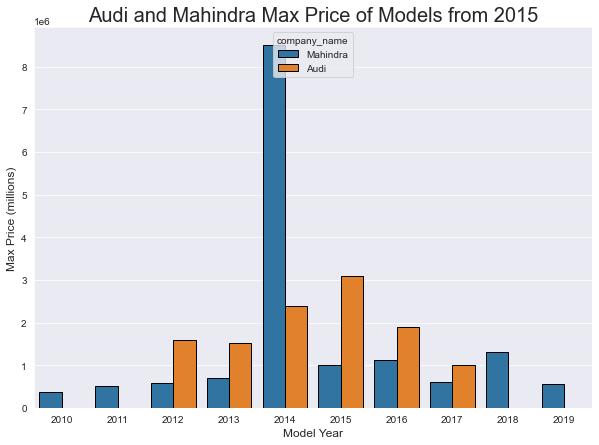

In [269]:
g5=sns.barplot(x='Year', y='Price', data=mahi_aud_models_max, hue='company_name', edgecolor='black')
g5.set_title('Audi and Mahindra Max Price of Models from 2015', fontsize=20)
g5.set_xlabel('Model Year', fontsize=12)
g5.set_ylabel('Max Price (millions)', fontsize=12)
plt.show()

In [266]:
mahi_aud_cars = models_from_2010[(models_from_2010['company_name']=="Audi") | (models_from_2010['company_name']=="Mahindra") ]
mahi_aud_models_med = mahi_aud_cars.groupby(['Year', 'company_name']).agg({'Price': 'median'}).reset_index()

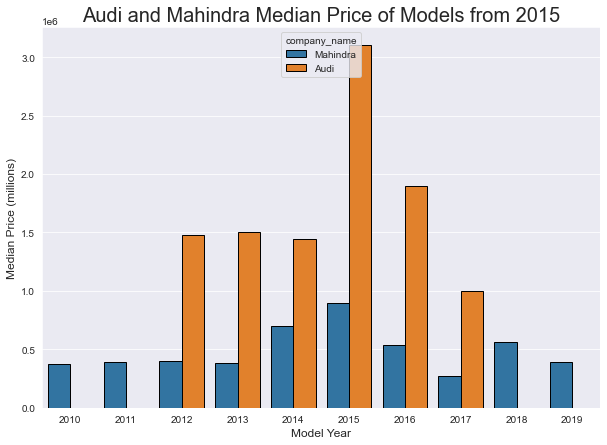

In [267]:
g5=sns.barplot(x='Year', y='Price', data=mahi_aud_models_med, hue='company_name', edgecolor='black')
g5.set_title('Audi and Mahindra Median Price of Models from 2015', fontsize=20)
g5.set_xlabel('Model Year', fontsize=12)
g5.set_ylabel('Median Price (millions)', fontsize=12)
plt.show()

#### After plotting using the median price we can notice that the audi cars are still expensive more than mahindra cars for the 2012 to 2017 models listed on the site. It can also be noticed that for even for the 2014 models the audi cars are still expensive because we have elimiated the effect of the outliers.